In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [16]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.shape
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


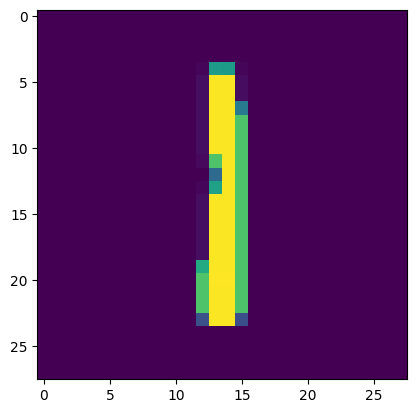

In [17]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[2,1:].values.reshape(28,28))

In [18]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


In [19]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=35)

In [20]:
x_train.shape


(33600, 784)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
KNN=KNeighborsClassifier()

In [23]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
accuracy = KNN.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9654761904761905


# Applying PCA

In [27]:
from sklearn.decomposition import PCA

In [33]:
x = x / 255.0

#  Apply PCA then split the train test data 

pca = PCA(n_components=90, random_state=42)

x_pca = pca.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=35)


In [35]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
#  minimize the n-compunante untill gitting the best accuracy out of small dimencions 
accuracy = KNN.score(x_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9702380952380952


In [37]:
import matplotlib.pyplot as plt

# Plotting the depanance of the cumulative explianed variance to the PCA number of component # 

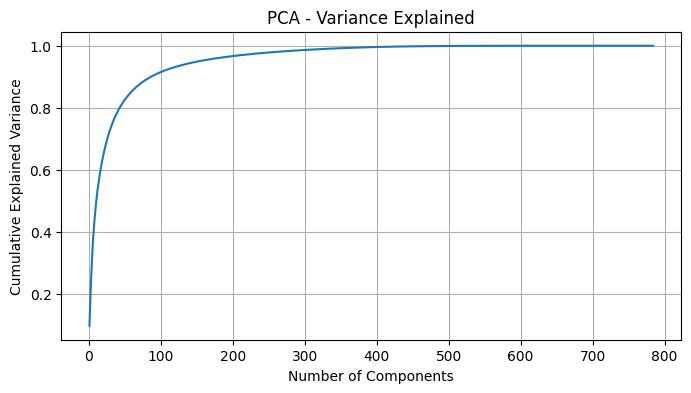

In [38]:
pca_full = PCA().fit(x)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), pca_full.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show()
